Final Plots

In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress scientific notation (show full number)
pd.options.display.float_format = '{:.0f}'.format

In [742]:
mlb_dataset = pd.read_csv(r'cleansed_data\atten_wins_payroll.csv')

In [743]:
#create cost per win column
mlb_dataset['Cost Per Win'] = mlb_dataset['Total Payroll'] / mlb_dataset['Wins'].astype(int)
#create cost per fan column
mlb_dataset['Cost Per Fan'] = mlb_dataset['Total Payroll'] / mlb_dataset['Attendance'].astype(int)

mlb_dataset.head()

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,112763571,84,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,75993333,74,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,89077233,52,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,199727500,104,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,173935000,101,3129931,38641,1722129,56


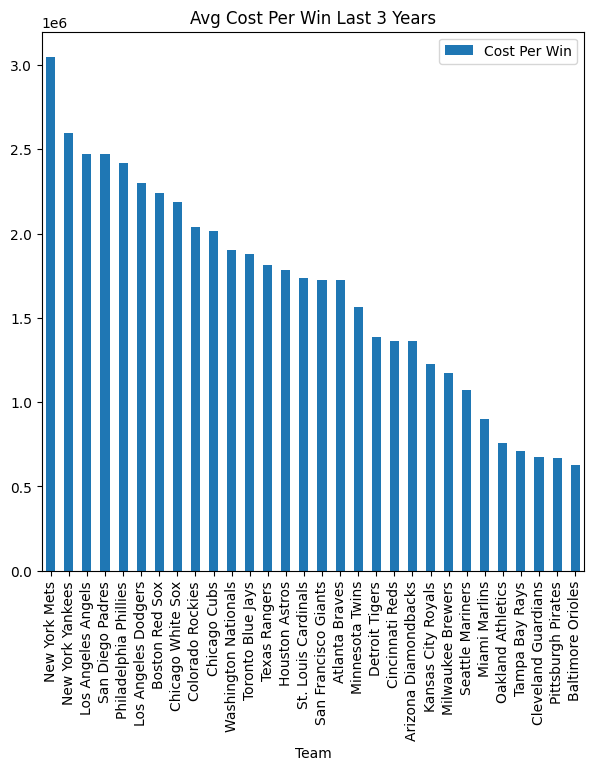

In [744]:
avg_cost_per_win = mlb_dataset.groupby(['Team'])['Cost Per Win'].mean()
avg_cost_per_win = avg_cost_per_win.to_frame()
avg_cost_per_win.sort_values(by='Cost Per Win',ascending=False, inplace=True)

plot_avg_cost = avg_cost_per_win.plot(kind='bar', title='Avg Cost Per Win Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

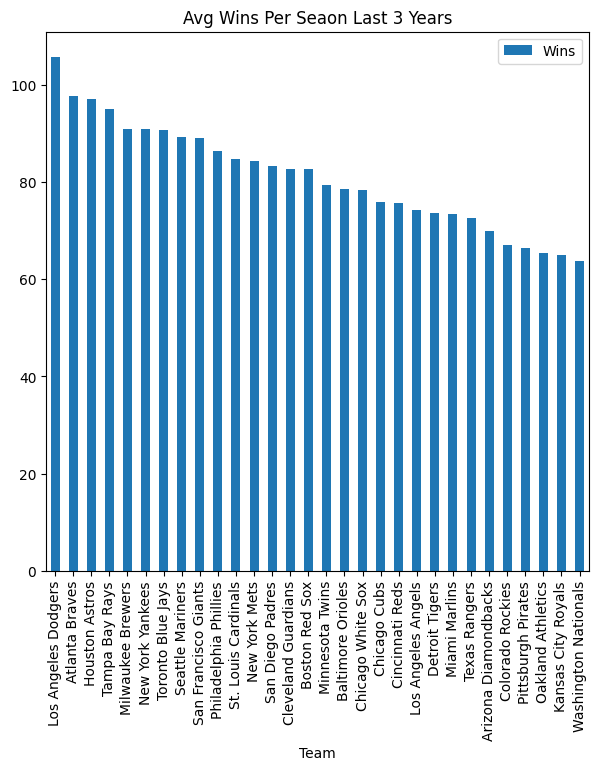

In [745]:
avg_wins_3seasons = mlb_dataset.groupby(['Team'])['Wins'].mean()
avg_wins_3seasons = avg_wins_3seasons.to_frame()
avg_wins_3seasons.sort_values(by='Wins',ascending=False, inplace=True)

plot_avg_wins = avg_wins_3seasons.plot(kind='bar', title='Avg Wins Per Seaon Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

<Axes: xlabel='Team'>

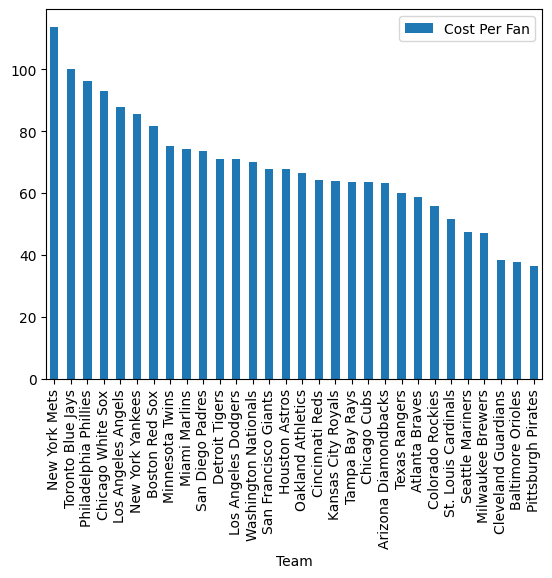

In [746]:
cost_per_fan = mlb_dataset.groupby(['Team'])['Cost Per Fan'].mean()
cost_per_fan = cost_per_fan.to_frame()
cost_per_fan.sort_values(by='Cost Per Fan', ascending=False, inplace=True)


cost_per_fan.plot.bar()

In [747]:
low_avg_cost_per_win = avg_cost_per_win['Cost Per Win'].nsmallest(15)
low_cost_per_fan = cost_per_fan['Cost Per Fan'].nsmallest(15)
top_avg_wins_3seasons = avg_wins_3seasons['Wins'].nlargest(15)

low_avg_cost_per_win = low_avg_cost_per_win.to_frame()
low_cost_per_fan = low_cost_per_fan.to_frame()
top_avg_wins_3seasons = top_avg_wins_3seasons.to_frame()


top_teams = top_avg_wins_3seasons.merge(low_avg_cost_per_win, on='Team').merge(low_cost_per_fan, on="Team")

top_teams


,Wins,Cost Per Win,Cost Per Fan
Team,,,
Atlanta Braves,98,1723511,59
Tampa Bay Rays,95,711028,64
Milwaukee Brewers,91,1174860,47
Seattle Mariners,89,1074310,47
Cleveland Guardians,83,677427,39


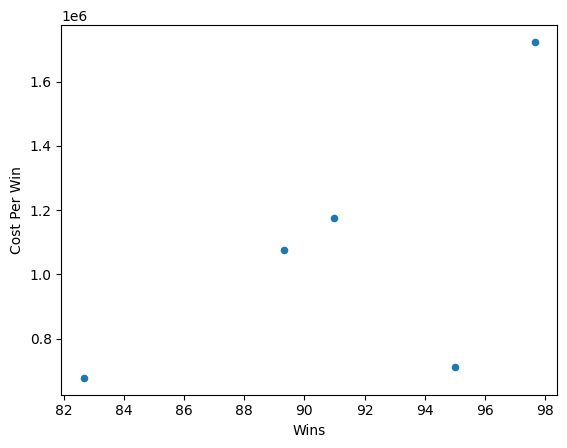

In [748]:
top_teams.plot(kind='scatter', x='Wins', y='Cost Per Win')
plt.show()